<a href="https://colab.research.google.com/github/charvig23/people_detection_project/blob/main/Copy_of_people_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Jul 31 13:37:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**packages to load**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import train_test_split

**getting the labels corresponding to the image**

In [ ]:
label_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET_PERSON_DETECTION/labels.csv')
label_df.columns = ['frame' , 'No. of people']
label_df.head()

,frame,No. of people
0,frame_0000.jpg,21
1,frame_0001.jpg,22
2,frame_0002.jpg,23
3,frame_0003.jpg,22
4,frame_0004.jpg,22


**loading the images in vector format**

In [ ]:
img = np.load('/content/drive/MyDrive/Colab Notebooks/DATASET_PERSON_DETECTION/All_Frames.npy')
img.shape

(341, 360, 640, 3)

In [ ]:
labels = np.array(label_df['No. of people'])
labels

array([21, 22, 23, 22, 22, 24, 23, 23, 23, 22, 23, 23, 23, 20, 18, 19, 17,
       21, 22, 21, 20, 19, 22, 23, 20, 18, 19, 22, 20, 19, 22, 19, 19, 19,
       19, 19, 17, 18, 19, 20, 20, 21, 20, 18, 20, 22, 21, 21, 22, 22, 23,
       24, 24, 24, 24, 25, 24, 26, 25, 23, 22, 19, 20, 21, 19, 20, 21, 24,
       24, 25, 22, 21, 21, 25, 25, 27, 28, 25, 27, 27, 28, 28, 25, 25, 26,
       26, 26, 25, 26, 26, 26, 27, 29, 27, 24, 27, 27, 26, 28, 28, 27, 27,
       25, 28, 27, 25, 24, 26, 24, 24, 22, 23, 22, 25, 24, 21, 22, 19, 20,
       18, 22, 22, 23, 22, 23, 23, 22, 22, 24, 20, 21, 21, 20, 20, 20, 20,
       20, 20, 21, 19, 18, 18, 21, 20, 19, 20, 21, 20, 20, 18, 17, 20, 19,
       20, 18, 18, 19, 19, 21, 19, 21, 19, 19, 19, 18, 22, 20, 21, 22, 21,
       22, 22, 21, 20, 20, 21, 21, 22, 23, 22, 24, 22, 22, 22, 21, 21, 21,
       19, 21, 20, 20, 21, 24, 23, 22, 21, 20, 22, 21, 21, 21, 22, 20, 20,
       21, 21, 20, 22, 20, 21, 20, 21, 20, 20, 17, 18, 18, 18, 16, 18, 18,
       19, 21, 22, 21, 22

**setting features and target value**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(img, labels, test_size=0.1)
print(x_train.shape[0])
print(x_test.shape[0])

306
35


**Create model**

In [ ]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), input_shape=(360,640,3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)

])

model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 358, 638, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 179, 319, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 177, 317, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 88, 158, 128)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 88, 158, 128)      0         
                                                                 
 flatten (Flatten)           (None, 1779712)           0

**train the model**

In [ ]:
lr_monitor = tf.keras.callbacks.LearningRateScheduler(
                lambda epochs : 1e-8 * 10 ** (epochs/20))

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=45, batch_size=32, callbacks=[lr_monitor])

Epoch 1/45
10/10 [==============================] - 28s 1s/step - loss: 55.6051 - mae: 56.1051 - val_loss: 47.1032 - val_mae: 47.6032 - lr: 1.0000e-08
Epoch 2/45
10/10 [==============================] - 8s 803ms/step - loss: 38.8671 - mae: 39.3664 - val_loss: 29.8034 - val_mae: 30.3034 - lr: 1.1220e-08
Epoch 3/45
10/10 [==============================] - 8s 798ms/step - loss: 23.1506 - mae: 23.6476 - val_loss: 11.1668 - val_mae: 11.6619 - lr: 1.2589e-08
Epoch 4/45
10/10 [==============================] - 8s 805ms/step - loss: 12.2061 - mae: 12.6946 - val_loss: 4.5038 - val_mae: 4.9993 - lr: 1.4125e-08
Epoch 5/45
10/10 [==============================] - 8s 804ms/step - loss: 11.8857 - mae: 12.3802 - val_loss: 6.3084 - val_mae: 6.7688 - lr: 1.5849e-08
Epoch 6/45
10/10 [==============================] - 8s 809ms/step - loss: 11.8177 - mae: 12.3071 - val_loss: 4.1127 - val_mae: 4.5712 - lr: 1.7783e-08
Epoch 7/45
10/10 [==============================] - 8s 807ms/step - loss: 11.9439 - mae: 1

**plot mae**

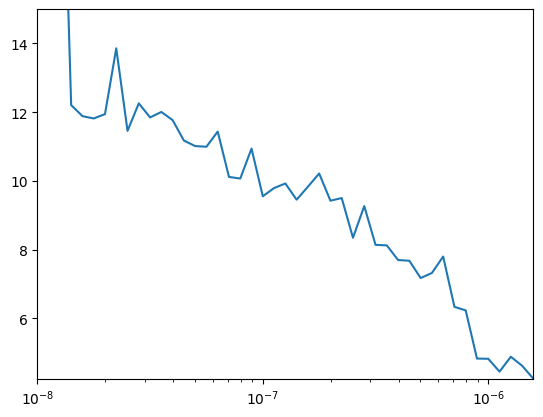

In [ ]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([np.min(history.history['lr']), np.max(history.history['lr']), np.min(history.history['loss']), 15])
plt.show()

In [ ]:
np.max(history.history['lr'])

1.5848932e-06

**changing the learning rate to 1e-6 and re-run the model**

In [ ]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(lr=1e-6), metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 358, 638, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 179, 319, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 177, 317, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 88, 158, 128)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 88, 158, 128)      0         
                                                                 
 flatten (Flatten)           (None, 1779712)           0

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=90, batch_size=32)

Epoch 1/90
10/10 [==============================] - 9s 821ms/step - loss: 61635692.0000 - mae: 3756.5437 - val_loss: 24961.2422 - val_mae: 157.9382
Epoch 2/90
10/10 [==============================] - 8s 777ms/step - loss: 4137.2246 - mae: 42.6644 - val_loss: 384.9368 - val_mae: 19.4479
Epoch 3/90
10/10 [==============================] - 8s 782ms/step - loss: 205.0015 - mae: 12.9401 - val_loss: 106.2770 - val_mae: 10.0132
Epoch 4/90
10/10 [==============================] - 8s 778ms/step - loss: 26.0293 - mae: 4.0769 - val_loss: 8.9360 - val_mae: 2.5191
Epoch 5/90
10/10 [==============================] - 8s 781ms/step - loss: 8.4689 - mae: 2.3793 - val_loss: 4.8133 - val_mae: 1.7807
Epoch 6/90
10/10 [==============================] - 8s 779ms/step - loss: 4.2265 - mae: 1.6258 - val_loss: 4.2058 - val_mae: 1.7255
Epoch 7/90
10/10 [==============================] - 8s 777ms/step - loss: 2.4141 - mae: 1.2660 - val_loss: 2.7770 - val_mae: 1.3388
Epoch 8/90
10/10 [============================

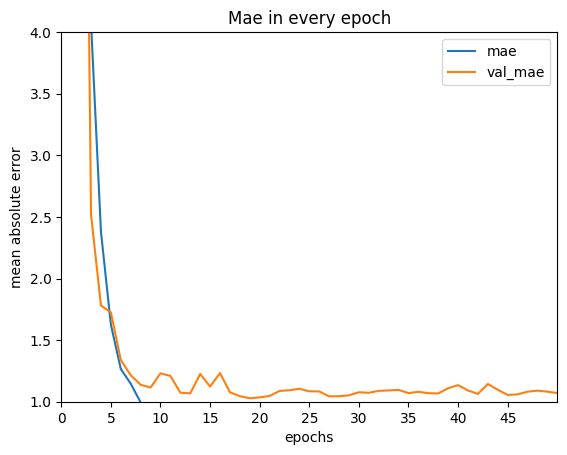

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['mae', 'val_mae'])
plt.ylim(1, 4)
plt.xlim(0, 50)

plt.xticks(np.arange(0,50, 5))

plt.xlabel('epochs')
plt.ylabel('mean absolute error')
plt.title('Mae in every epoch')
plt.show()

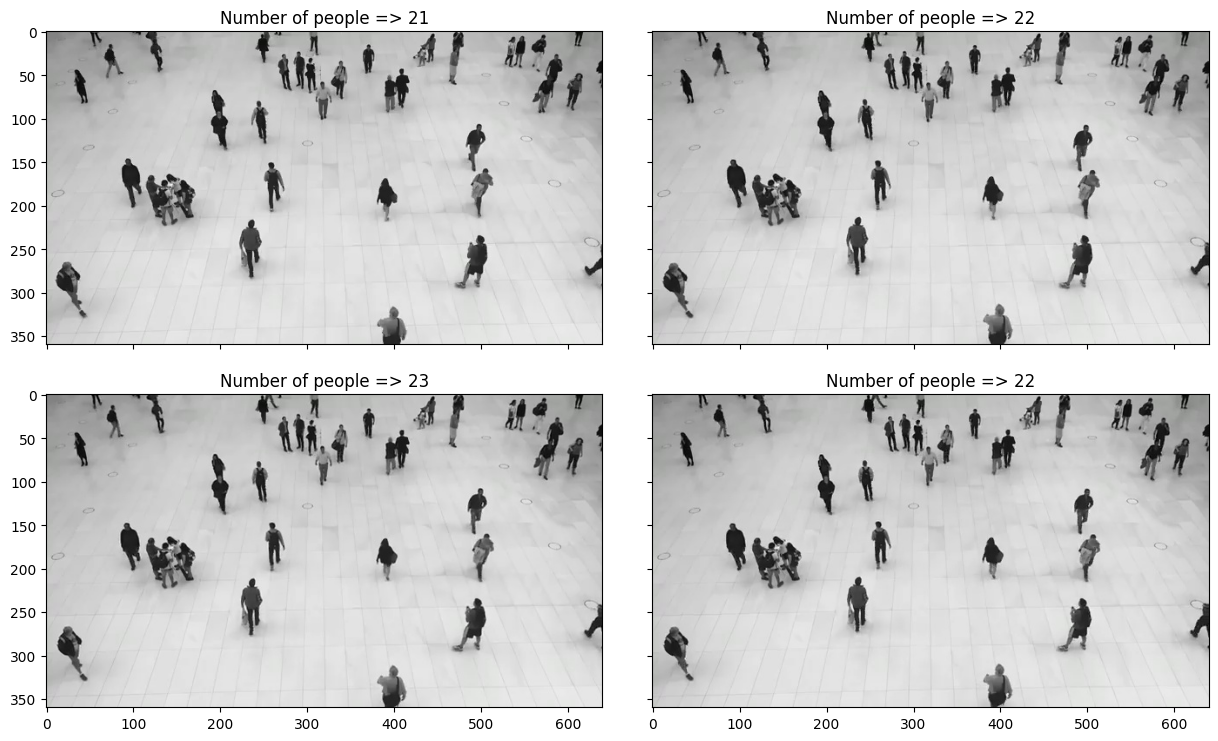

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


# set figure size

fig = plt.figure(figsize=(15,15))
grid = ImageGrid(
        fig, 111,
        nrows_ncols=(2,2),
        axes_pad=0.5
)

for x in range(0,4):

    grid[x].set_title('Number of people => ' + str(labels[x]))
    grid[x].imshow(img[x])